# Membership Functions

A membership function is a method of translating a crisp value $x \in \mathbb{R}$ into a fuzzy set. In other words, we can find the membership grade (the amount of membership) for x with a value between 0 and 1. If the membership grade is only 0 or 1, then we are using classical sets.

$
A = \{(x, \mu_A(x)) | x \in X\},
$

where $\mu_A(x)$ is the Membership function (MF) for the fuzzy set $A$.

In [1]:
import os; os.chdir("../")

In [2]:
from functools import partial

import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Our Membership Functions import
from src.functional.membership import *

In [3]:
x = torch.linspace(0, 100, 100).view(-1, 1)

def draw_function(func):
    sns.lineplot(x.flatten().numpy(), func.flatten())
    plt.xlabel("$x_i$")
    plt.ylabel("Membership Value")
    plt.grid()

# Triangluar Function

A triangular MF is created using three parameters $\{a, b, c\}, a < b < c$:

$
\operatorname{triangle}(x ; a, b, c)=\left\{\begin{array}{cc}{0,} & {x \leq a} \\ {\frac{x-a}{b-a},} & {a \leq x \leq b} \\ {\frac{c-x}{c-b},} & {b \leq x \leq c} \\ {0,} & {c \leq x}\end{array}\right.
$


In [4]:
help(triangle)

Help on function triangle in module src.functional.membership:

triangle(x, a, b, c)
    Triangular Membership Function
    
    :param x: input value
    :param a: start point where membership is 0
    :param b: center point where membership is 1
    :param c: end point where membership is 0



Text(82, tensor([0.]), 'c')

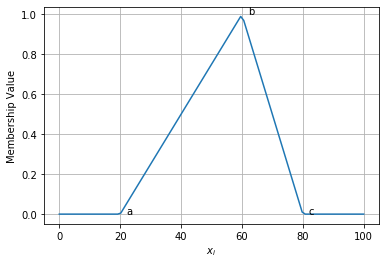

In [5]:
tri = partial(triangle, a=20, b=60, c=80)

draw_function(tri(x))

plt.text(22, tri(20), "a")
plt.text(62, tri(60), "b")
plt.text(82, tri(80), "c")

## Trapezoid Membership Function

$
\operatorname{trapezoid}(x ; a, b, c, d)=\left\{\begin{array}{ll}{0,} & {x \leq a} \\ {\frac{x-a}{b-a},} & {a \leq x \leq b} \\ {\frac{d-x}{d-c},} & {c \leq x \leq d} \\ {0,} & {d \leq x}\end{array}\right.
$

In [6]:
help(trapezoid)

Help on function trapezoid in module src.functional.membership:

trapezoid(x, a, b, c, d)
    Trapezoidal Membership Function
    
    :param x: input value
    :param a: bottom left point where membership is 0
    :param b: top left point where membership is 1
    :param c: top right point where membership is 1
    :param d: bottom right point where membership is 0



Text(96, tensor([0.]), 'd')

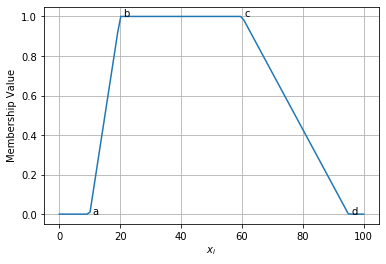

In [7]:
trap = partial(trapezoid, a=10, b=20, c=60, d=95)

draw_function(trap(x))

plt.text(11, trap(10), "a")
plt.text(21, trap(20), "b")
plt.text(61, trap(60), "c")
plt.text(96, trap(95), "d")

## Gaussian Membership Function

$
\operatorname{gaussian}(x ; c, \sigma)=e^{-\frac{1}{2}\left(\frac{x-c}{\sigma}\right)^{2}}
$

In [8]:
help(gaussian)

Help on function gaussian in module src.functional.membership:

gaussian(x, a, b)
    Gaussian Membership Function
    
    :param x: input value
    :param a: The mean of the Gaussian Distribution
    :param b: The standard deviation of the Distribution
    
    Usage: gaussian(40, a=50, b=20)
           gaussian(torch.Tensor([[20],[30]]), a=50, b=20)



Text(72, tensor([0.6065]), 'Standard Deviation')

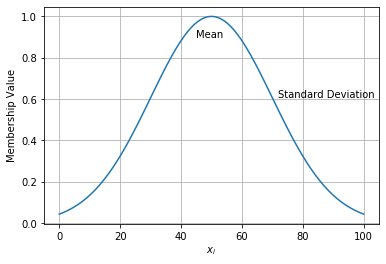

In [9]:
gaus = partial(gaussian, a=50, b=20)

draw_function(gaus(x))

plt.text(50-5, gaus(50)-0.1, "Mean")
plt.text(50+22, gaus(50+20), "Standard Deviation")

## General Bell Curve Membership Function

$
\operatorname{bell}(x ; a, b, c)=\frac{1}{1+\left|\frac{x-c}{a}\right|^{2 b}}
$

In [10]:
help(bell)

Help on function bell in module src.functional.membership:

bell(x, a, b, c)
    General Bell Curve Membership Function
    
    :param x: input value
    :param a: width of bell curve.
    :param b: slop of the curve, lower values = curvier
    :param c: centre of the curve.



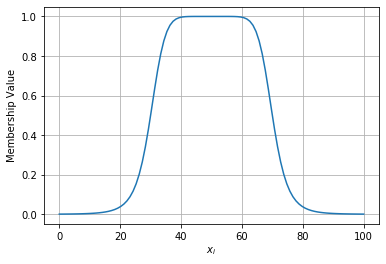

In [11]:
bellf = partial(bell, a=20, b=4, c=50)

draw_function(bellf(x))

# Sigmoidal Membership Function

$
\operatorname{sigmoid}(x ; a, c)=\frac{1}{1+\exp [-a(x-c)]}
$

In [12]:
help(sigmoid)

Help on function sigmoid in module src.functional.membership:

sigmoid(x, a, b)
    Sigmoidal Membership Function
    
    :param x: input value
    :param a: amount of curvature, higher values = unit step
    :param b: 0.5 centre posistion



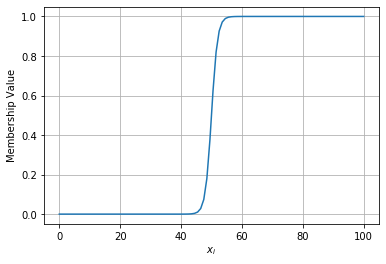

In [13]:
sig = partial(sigmoid, a=1, b=50)

draw_function(sig(x))

## Left-Right (LR) Membership Function

$
\operatorname{lr}(x ; c, \alpha, \beta)=\left\{\begin{array}{ll}{F_{L}} & {\left(\frac{c-x}{\alpha}\right), \quad x \leq c} \\ {F_{R}} & {\left(\frac{x-c}{\beta}\right), \quad x \geq c}\end{array}\right.
$

where $F_L(x)$ and $F_R(x)$ are monotonically decreasing functions. Let 

$
\begin{aligned} F_{L}(x) &=\max \left(0, \sqrt{1-x^{2}}\right) \\ F_{R}(x) &=e^{-|x|^{3}} \end{aligned}
$

In [14]:
help(lr)

Help on function lr in module src.functional.membership:

lr(x, a, b, c)
    Left-Right (LR) Membership Function
    
    :param x: input value
    :param a: centre point of change
    :param b: rate of decay after change
    :param c: length of decay



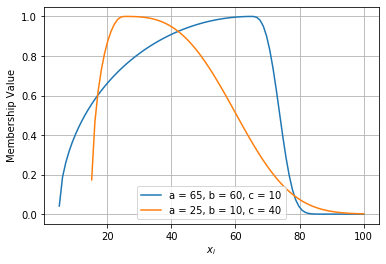

In [15]:
lr1 = partial(lr, a=65, b=60, c=10)
lr2 = partial(lr, a=25, b=10, c=40)

draw_function(lr1(x))
draw_function(lr2(x))

plt.grid()
plt.legend(["a = 65, b = 60, c = 10", "a = 25, b = 10, c = 40"])

# Multi-Dimensional Functions

The combination of different functions can be applied to many inputs. Here, we shall consider two variables $x, y$ to demonstrate how MFs can be used with AND, OR operations.

In [16]:
# Our two variables
x = torch.linspace(-5, 5, 50)
y = torch.linspace(-5, 5, 50)

The single dimension function can be referred to as a $\textit{base set}$.

$
\operatorname{Base Set} = \mu_A(x) = \operatorname{gaussian}(x; a, b)
$

Text(0.5, 1.0, 'Base set of A')

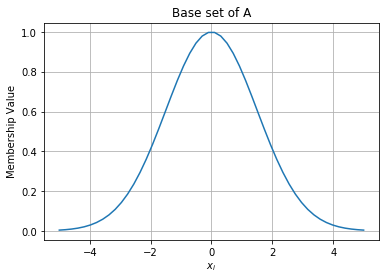

In [17]:
fig = plt.figure()

draw_function(gaussian(x, 0, 1.5))

plt.title("Base set of A")

This can be turned into a cylindrical extension through:

$
    c(A) = \int_{X \times Y} \mu_A(X) / (x, y)
$

where c(A) is our cylindrical extension.

Text(0.5, 0, 'Membership Value')

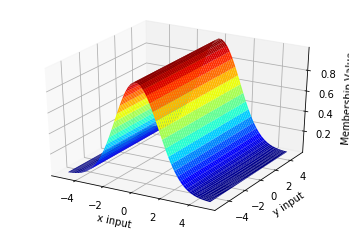

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

xx, yy = np.meshgrid(x.numpy(), y.numpy())

ax.plot_surface(xx, 
                yy,
                gaussian(torch.Tensor(xx), 0., 1.5).numpy(),
                cmap="jet")

ax.set_xlabel("x input")
ax.set_ylabel("y input")
ax.set_zlabel("Membership Value")

To use AND and OR operations, we can use the min and max respectively of two MF functions for each input dimension. The logical `and` is:

$
\mu_A(x) \land \mu_A(y) = max(\mu_A(x), \mu_A(y))
$

and the logical `or` is:

$
\mu_A(x) \lor \mu_A(y) = min(\mu_A(x), \mu_A(y))
$

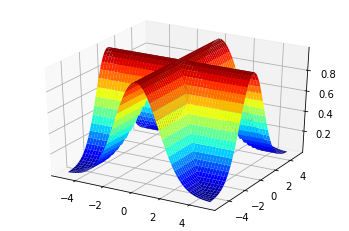

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

xx, yy = np.meshgrid(x.numpy(), y.numpy())

andOp = torch.max(gaussian(torch.Tensor(xx), 0, 1.5), gaussian(torch.Tensor(yy), 0, 1.5))

ax.plot_surface(xx, yy, andOp.numpy(), cmap="jet")

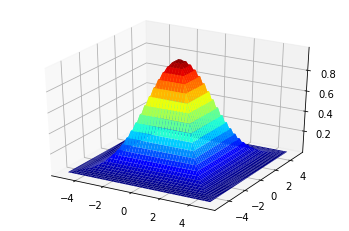

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

orOp = torch.min(gaussian(torch.Tensor(xx), 0, 1.5), gaussian(torch.Tensor(yy), 0, 1.5))

ax.plot_surface(xx, yy, orOp.numpy(), cmap="jet")